In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## combine processing technqiues
from sklearn.compose import ColumnTransformer

In [10]:
business_data=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Business_Data.csv")

In [11]:
d={}
for i in business_data.columns:
    d[i]=str(business_data[i].dtype)

In [12]:
d

{'Store': 'int64',
 'Date': 'object',
 'Temperature': 'float64',
 'Fuel_Price': 'float64',
 'MarkDown1': 'float64',
 'MarkDown2': 'float64',
 'MarkDown3': 'float64',
 'MarkDown4': 'float64',
 'MarkDown5': 'float64',
 'CPI': 'float64',
 'Unemployment_Rate': 'float64',
 'Holiday': 'bool'}

In [13]:
sales_history=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Sales_History.csv")

In [14]:
d={}
for i in sales_history.columns:
    d[i]=str(sales_history[i].dtype)

In [15]:
d

{'Store': 'int64',
 'Department': 'int64',
 'Date': 'object',
 'Total_Sales': 'float64',
 'Holiday': 'bool'}

In [16]:
Store_Details=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Store_Details.csv",encoding='latin1')

In [17]:
d={}
for i in Store_Details.columns:
    d[i]=str(Store_Details[i].dtype)

In [18]:
d

{'Store': 'int64',
 'Type': 'object',
 'Address': 'object',
 'Area_Code': 'int64',
 'Location': 'object',
 'Size': 'int64'}

In [19]:
True and True and True

True

## EDA ON STORE SALES DATA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
store_df=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Store_Details.csv",encoding="latin")
store_df.head()

,Store,Type,Address,Area_Code,Location,Size
0,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,2,E-Commerce Fulfillment,"1000 Commerce Ave, Atwater, California",95301,Bayfair Cente,202307
2,3,Food,"15555 East 14th Street, San Leandro, California",94578,Capitola Mal,37392
3,4,E-Commerce Fulfillment,"1855 41st Avenue, Capitola, California",95010,Chino Spectrum Marketplace & Towne Cente,205863
4,5,Food,"3800-4046 Grand Ave.& 3801-4097 Grand Ave., Ch...",91710,Eagle Rock Plaz,34875


In [22]:
#checking for null values in the data
store_df.isnull().sum()

Store        0
Type         0
Address      0
Area_Code    0
Location     0
Size         0
dtype: int64

In [23]:
len(store_df["Location"].unique())

45

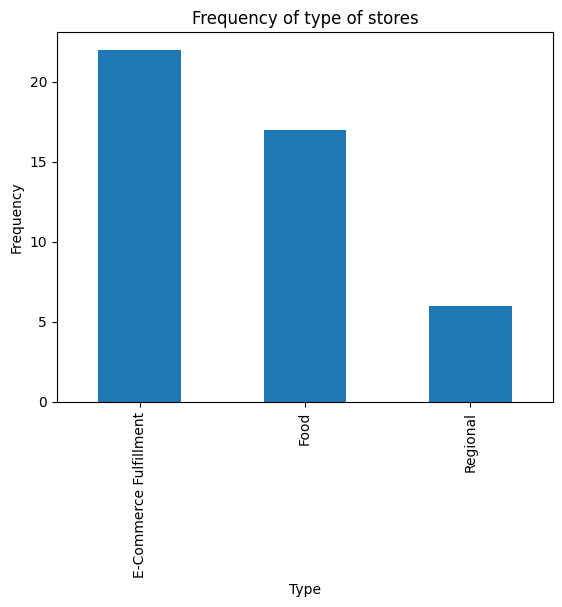

In [24]:
#Type of stores
store_df["Type"].value_counts().plot.bar()
plt.title("Frequency of type of stores")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.show()

## EDA ON SALES HISTORY DATA

In [25]:
df=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Sales_History.csv")
df.head()

,Store,Department,Date,Total_Sales,Holiday
0,1,1,4/30/2017,24924.50,False
1,1,1,11/30/2017,46039.49,True
2,1,1,2/17/2017,41595.55,False
3,1,1,2/24/2017,19403.54,False
4,1,1,5/1/2017,21827.90,False


In [26]:
#checking for nulls
df.isnull().sum()

Store          0
Department     0
Date           0
Total_Sales    0
Holiday        0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        421570 non-null  int64  
 1   Department   421570 non-null  int64  
 2   Date         421570 non-null  object 
 3   Total_Sales  421570 non-null  float64
 4   Holiday      421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [28]:
#converting date column object to date format
df.Date=pd.to_datetime(df.Date)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        421570 non-null  int64         
 1   Department   421570 non-null  int64         
 2   Date         421570 non-null  datetime64[ns]
 3   Total_Sales  421570 non-null  float64       
 4   Holiday      421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [30]:
import datetime as dt

In [31]:
df["Date"].dt.year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
421565    2019
421566    2019
421567    2019
421568    2019
421569    2019
Name: Date, Length: 421570, dtype: int64

In [32]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

In [33]:
df

,Store,Department,Date,Total_Sales,Holiday,year,month,day
0,1,1,2017-04-30,24924.50,False,2017,4,30
1,1,1,2017-11-30,46039.49,True,2017,11,30
2,1,1,2017-02-17,41595.55,False,2017,2,17
3,1,1,2017-02-24,19403.54,False,2017,2,24
4,1,1,2017-05-01,21827.90,False,2017,5,1
...,...,...,...,...,...,...,...,...
421565,45,98,2019-09-27,508.37,False,2019,9,27
421566,45,98,2019-05-09,628.10,False,2019,5,9
421567,45,98,2019-12-09,1061.02,False,2019,12,9
421568,45,98,2019-10-18,760.01,False,2019,10,18


In [34]:
df.groupby("Store")["Department"].count()

Store
1     10244
2     10238
3      9036
4     10272
5      8999
6     10211
7      9762
8      9895
9      8867
10    10315
11    10062
12     9705
13    10474
14    10040
15     9901
16     9443
17     9864
18     9859
19    10148
20    10214
21     9582
22     9688
23    10050
24    10228
25     9804
26     9854
27    10225
28    10113
29     9455
30     7156
31    10142
32    10202
33     6487
34    10224
35     9528
36     6222
37     7206
38     7362
39     9878
40    10017
41    10088
42     6953
43     6751
44     7169
45     9637
Name: Department, dtype: int64

In [35]:
df2=pd.DataFrame(df.groupby(["year","month"])["Total_Sales"].mean())

In [36]:
# Sales were very low in the year of 2019 after 10 th month but for 2017 and 2018 after 10th month there was very high sales

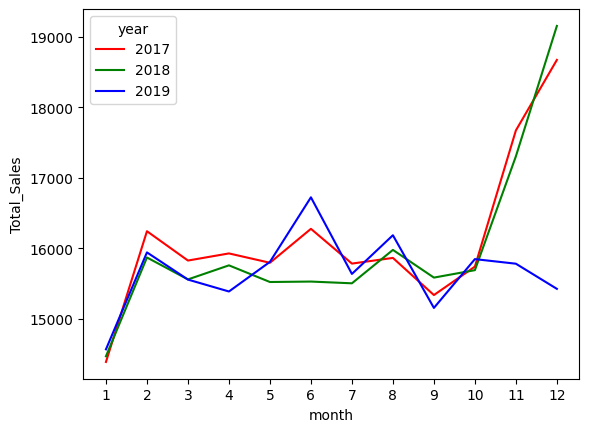

In [37]:
sns.lineplot(data=df2,x="month",y="Total_Sales",hue="year",palette=['r', 'g','b'])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

In [38]:
import calendar

In [39]:
# df.drop(["year","month","day"],axis=1,inplace=True)

In [40]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      45 non-null     int64 
 1   Type       45 non-null     object
 2   Address    45 non-null     object
 3   Area_Code  45 non-null     int64 
 4   Location   45 non-null     object
 5   Size       45 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ KB


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        421570 non-null  int64         
 1   Department   421570 non-null  int64         
 2   Date         421570 non-null  datetime64[ns]
 3   Total_Sales  421570 non-null  float64       
 4   Holiday      421570 non-null  bool          
 5   year         421570 non-null  int64         
 6   month        421570 non-null  int64         
 7   day          421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 22.9 MB


In [42]:
tested_df=df.merge(right=store_df[["Store","Type"]],on="Store")

In [43]:
tested_df

,Store,Department,Date,Total_Sales,Holiday,year,month,day,Type
0,1,1,2017-04-30,24924.50,False,2017,4,30,E-Commerce Fulfillment
1,1,1,2017-11-30,46039.49,True,2017,11,30,E-Commerce Fulfillment
2,1,1,2017-02-17,41595.55,False,2017,2,17,E-Commerce Fulfillment
3,1,1,2017-02-24,19403.54,False,2017,2,24,E-Commerce Fulfillment
4,1,1,2017-05-01,21827.90,False,2017,5,1,E-Commerce Fulfillment
...,...,...,...,...,...,...,...,...,...
421565,45,98,2019-09-27,508.37,False,2019,9,27,Food
421566,45,98,2019-05-09,628.10,False,2019,5,9,Food
421567,45,98,2019-12-09,1061.02,False,2019,12,9,Food
421568,45,98,2019-10-18,760.01,False,2019,10,18,Food


In [44]:
tested_df["Type"].unique()

array(['E-Commerce Fulfillment', 'Food', 'Regional'], dtype=object)

In [45]:
E_Commerce_Fulfillment_2017=pd.DataFrame(tested_df[(tested_df["Type"]=="E-Commerce Fulfillment") & (tested_df["year"]==2017)].groupby("month")["Total_Sales"].mean())
E_Commerce_Fulfillment_2018=pd.DataFrame(tested_df[(tested_df["Type"]=="E-Commerce Fulfillment") & (tested_df["year"]==2018)].groupby("month")["Total_Sales"].mean())
E_Commerce_Fulfillment_2019=pd.DataFrame(tested_df[(tested_df["Type"]=="E-Commerce Fulfillment") & (tested_df["year"]==2019)].groupby("month")["Total_Sales"].mean())
Food_2017=pd.DataFrame(tested_df[(tested_df["Type"]=="Food") & (tested_df["year"]==2017)].groupby("month")["Total_Sales"].mean())
Food_2018=pd.DataFrame(tested_df[(tested_df["Type"]=="Food") & (tested_df["year"]==2018)].groupby("month")["Total_Sales"].mean())
Food_2019=pd.DataFrame(tested_df[(tested_df["Type"]=="Food") & (tested_df["year"]==2019)].groupby("month")["Total_Sales"].mean())
Regional_2017=pd.DataFrame(tested_df[(tested_df["Type"]=="Regional") & (tested_df["year"]==2017)].groupby("month")["Total_Sales"].mean())
Regional_2018=pd.DataFrame(tested_df[(tested_df["Type"]=="Regional") & (tested_df["year"]==2018)].groupby("month")["Total_Sales"].mean())
Regional_2019=pd.DataFrame(tested_df[(tested_df["Type"]=="Regional") & (tested_df["year"]==2019)].groupby("month")["Total_Sales"].mean())

In [46]:
E_Commerce_Fulfillment_2017

,Total_Sales
month,
1,18152.745779
2,20328.853732
3,19665.436627
4,19966.413273
5,19766.625918
6,20297.579538
7,19685.557268
8,19817.467991
9,19191.699769


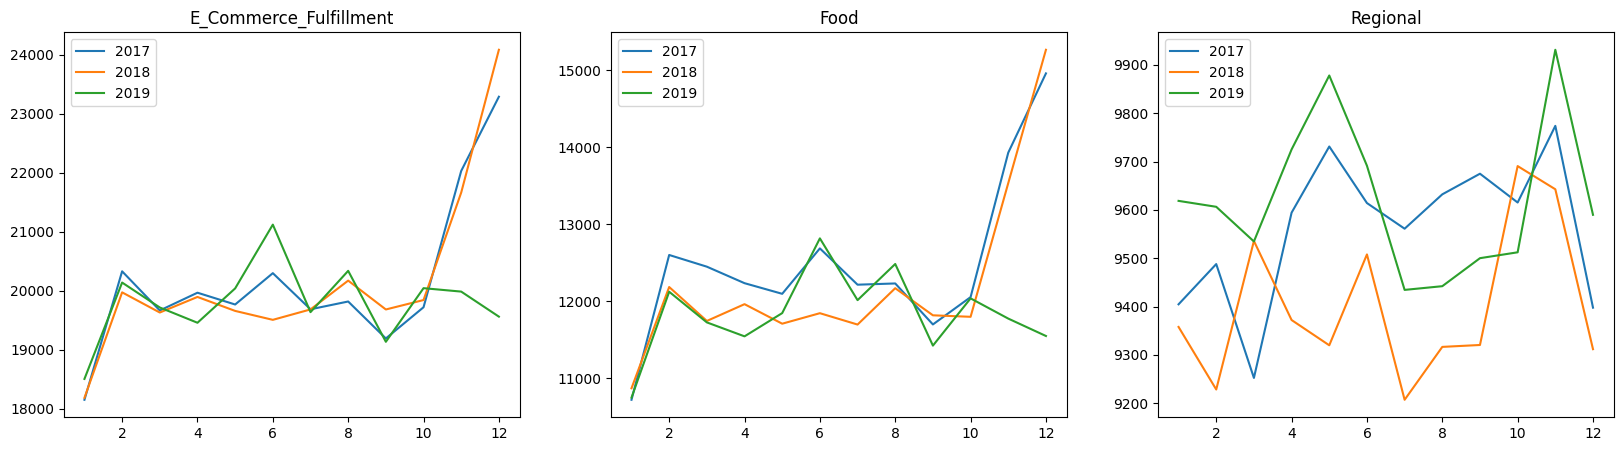

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
#E_Commerce_Fulfillment_2017
axs[0].plot(E_Commerce_Fulfillment_2017.index,E_Commerce_Fulfillment_2017["Total_Sales"],label="2017")
#E_Commerce_Fulfillment_2018
axs[0].plot(E_Commerce_Fulfillment_2018.index,E_Commerce_Fulfillment_2018["Total_Sales"],label="2018")
#E_Commerce_Fulfillment_2019
axs[0].plot(E_Commerce_Fulfillment_2019.index,E_Commerce_Fulfillment_2019["Total_Sales"],label="2019")
axs[0].title.set_text("E_Commerce_Fulfillment")
axs[0].legend()

#Food_2017
axs[1].plot(Food_2017.index,Food_2017["Total_Sales"],label="2017")
#Food_2018
axs[1].plot(Food_2018.index,Food_2018["Total_Sales"],label="2018")
#Food_2019
axs[1].plot(Food_2019.index,Food_2019["Total_Sales"],label="2019")
axs[1].title.set_text("Food")
axs[1].legend()


#Regional_2017
axs[2].plot(Regional_2017.index,Regional_2017["Total_Sales"],label="2017")
#Food_2018
axs[2].plot(Regional_2018.index,Regional_2018["Total_Sales"],label="2018")
#Food_2019
axs[2].plot(Regional_2019.index,Regional_2019["Total_Sales"],label="2019")
axs[2].title.set_text("Regional")
axs[2].legend()

- For the two type of store ecommerce fullfillment and food has a pattern that from 6 to 8 month they had a pick in sales and after 10 th month in the year of 2017 and 2018 they had a very high sales because from that month holidays had started but in the year of 2019 they had a very low sales
- For the type of Regional it had a pick of sales on the month 5 and 11 and it has high variances in regional sales

In [48]:
tested_df[(tested_df["Holiday"]==True) & (tested_df["year"]==2017)].groupby(["month"])["Total_Sales"].mean()

month
10    15537.758883
11    19368.456205
12    13738.538566
Name: Total_Sales, dtype: float64

In [49]:
tested_df[(tested_df["Holiday"]==True) & (tested_df["year"]==2018)].groupby(["month"])["Total_Sales"].mean()

month
9     15809.069483
10    16111.706191
11    22043.563476
12    15332.154858
Name: Total_Sales, dtype: float64

In [50]:
tested_df[(tested_df["Holiday"]==True) & (tested_df["year"]==2019)].groupby(["month"])["Total_Sales"].mean()

month
7     16294.692957
10    16664.247891
Name: Total_Sales, dtype: float64

In [51]:
tested_df[(tested_df["Holiday"]==True) & (tested_df["year"]==2019)]

,Store,Department,Date,Total_Sales,Holiday,year,month,day,Type
105,1,1,2019-10-01,36988.49,True,2019,10,1,E-Commerce Fulfillment
135,1,1,2019-07-08,18322.37,True,2019,7,8,E-Commerce Fulfillment
248,1,2,2019-10-01,50581.06,True,2019,10,1,E-Commerce Fulfillment
278,1,2,2019-07-08,47344.50,True,2019,7,8,E-Commerce Fulfillment
391,1,3,2019-10-01,12388.85,True,2019,10,1,E-Commerce Fulfillment
...,...,...,...,...,...,...,...,...,...
421282,45,95,2019-07-08,52417.47,True,2019,7,8,Food
421397,45,97,2019-10-01,6638.91,True,2019,10,1,Food
421427,45,97,2019-07-08,7426.19,True,2019,7,8,Food
421532,45,98,2019-10-01,770.86,True,2019,10,1,Food


In [52]:
tested_df.drop(["year","month","day"],axis=1,inplace=True)

In [53]:
tested_df

,Store,Department,Date,Total_Sales,Holiday,Type
0,1,1,2017-04-30,24924.50,False,E-Commerce Fulfillment
1,1,1,2017-11-30,46039.49,True,E-Commerce Fulfillment
2,1,1,2017-02-17,41595.55,False,E-Commerce Fulfillment
3,1,1,2017-02-24,19403.54,False,E-Commerce Fulfillment
4,1,1,2017-05-01,21827.90,False,E-Commerce Fulfillment
...,...,...,...,...,...,...
421565,45,98,2019-09-27,508.37,False,Food
421566,45,98,2019-05-09,628.10,False,Food
421567,45,98,2019-12-09,1061.02,False,Food
421568,45,98,2019-10-18,760.01,False,Food


In [54]:
tested_df2=pd.DataFrame(tested_df.groupby(["Store","Date"])["Total_Sales"].sum())

In [55]:
tested_df2=tested_df2.reset_index(level=0)

In [56]:
tested_df2=tested_df2.reset_index(level=0)

In [57]:
tested_df.Type.unique()

array(['E-Commerce Fulfillment', 'Food', 'Regional'], dtype=object)

In [58]:
# def type_store(x):
#     if x==1:
#         return "E-Commerce Fulfillment"
#     elif x==2:
#         return "Food"
#     else:
#         return "Regional"

In [59]:
# tested_df2["Type"]=tested_df2["Store"].apply(type_store)

In [60]:
tested_df2

,Date,Store,Total_Sales
0,2017-01-08,1,1453329.50
1,2017-02-02,1,1594968.28
2,2017-02-05,1,1492418.14
3,2017-02-17,1,1611968.17
4,2017-02-24,1,1409727.59
...,...,...,...
6430,2019-10-07,45,733037.32
6431,2019-10-18,45,718125.53
6432,2019-10-25,45,760281.43
6433,2019-11-04,45,770487.37


## EDA ON BUSINESS CSV

In [61]:
business_df=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Business_Data.csv")
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              8190 non-null   int64  
 1   Date               8190 non-null   object 
 2   Temperature        8190 non-null   float64
 3   Fuel_Price         8190 non-null   float64
 4   MarkDown1          4032 non-null   float64
 5   MarkDown2          2921 non-null   float64
 6   MarkDown3          3613 non-null   float64
 7   MarkDown4          3464 non-null   float64
 8   MarkDown5          4050 non-null   float64
 9   CPI                7605 non-null   float64
 10  Unemployment_Rate  7605 non-null   float64
 11  Holiday            8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [62]:
business_df.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4158
MarkDown2            5269
MarkDown3            4577
MarkDown4            4726
MarkDown5            4140
CPI                   585
Unemployment_Rate     585
Holiday                 0
dtype: int64

In [63]:
#handiling date column
business_df["Date"]=pd.to_datetime(business_df["Date"])

In [64]:
business_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday
0,1,2017-04-30,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2017-11-30,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2017-02-17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2017-02-24,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2017-05-01,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [65]:
business_df.shape

(8190, 12)

In [66]:
business_df=business_df[business_df["CPI"].notnull()]

In [67]:
business_df.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4156
MarkDown2            5164
MarkDown3            4521
MarkDown4            4631
MarkDown5            4140
CPI                     0
Unemployment_Rate       0
Holiday                 0
dtype: int64

In [68]:
business_df2=business_df.merge(tested_df2,how="left",on=["Store","Date"])

In [69]:
# business_df2["Type"]=business_df2["Store"].apply(type_store)

In [70]:
business_df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,2017-04-30,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90
1,1,2017-11-30,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44
2,1,2017-02-17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17
3,1,2017-02-24,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59
4,1,2017-05-01,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68


In [71]:
test_data=business_df2[business_df2.Total_Sales.isnull()]

In [72]:
test_data.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1               1
MarkDown2             366
MarkDown3             132
MarkDown4             161
MarkDown5               0
CPI                     0
Unemployment_Rate       0
Holiday                 0
Total_Sales          1170
dtype: int64

In [73]:
test_data=test_data.merge(store_df,on="Store",how="left")

In [74]:
test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Address,Area_Code,Location,Size
0,1,2019-02-09,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,1,2019-09-10,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
2,1,2019-11-15,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
3,1,2019-11-22,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,1,2019-11-29,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,NaN,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315


In [75]:
test_data=test_data.drop(["Address","Area_Code","Location"],axis=1)

In [76]:
data=business_df2[business_df2.Total_Sales.notnull()]

In [77]:
data.shape

(6435, 13)

In [78]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,2017-04-30,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1643690.90
1,1,2017-11-30,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1641957.44
2,1,2017-02-17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1611968.17
3,1,2017-02-24,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1409727.59
4,1,2017-05-01,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1554806.68


In [79]:
data.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4155
MarkDown2            4798
MarkDown3            4389
MarkDown4            4470
MarkDown5            4140
CPI                     0
Unemployment_Rate       0
Holiday                 0
Total_Sales             0
dtype: int64

In [80]:
data=data.fillna(0)

In [81]:
data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
Total_Sales          0
dtype: int64

In [82]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1611968.17
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68


In [83]:
#changing the total sales amount based on markdowns
data["Total_Sales"]=data["Total_Sales"]-(data["MarkDown1"]+data["MarkDown2"]+data["MarkDown3"])

In [84]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1643690.90
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1641957.44
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1611968.17
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1409727.59
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1554806.68


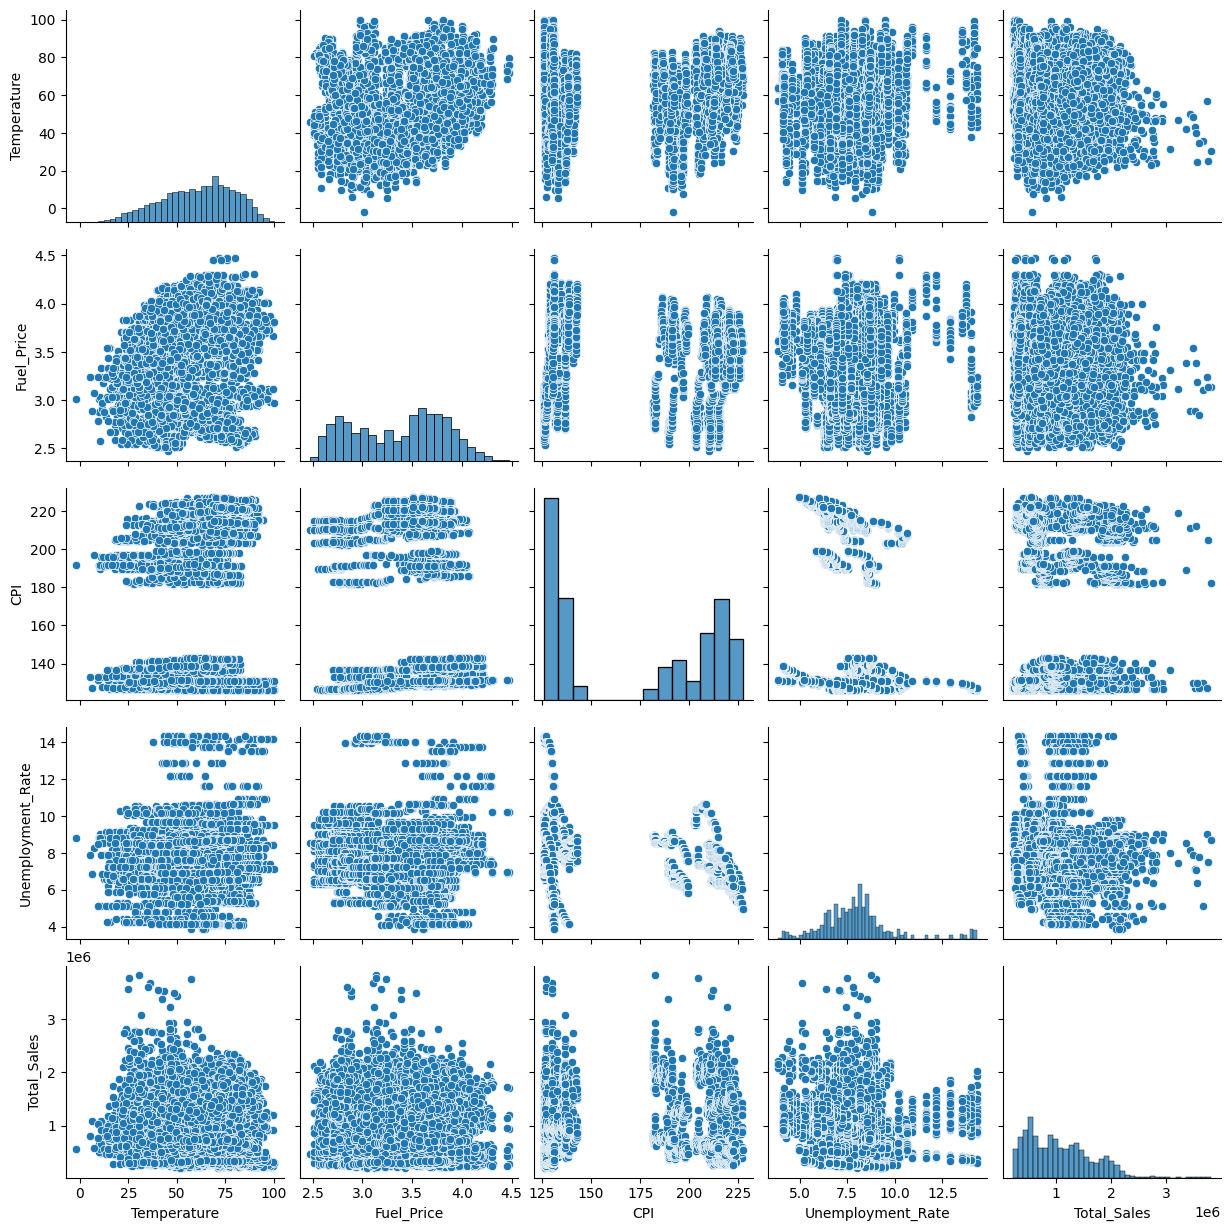

In [85]:
sns.pairplot(data[["Temperature","Fuel_Price","CPI","Unemployment_Rate","Total_Sales"]])

In [86]:
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

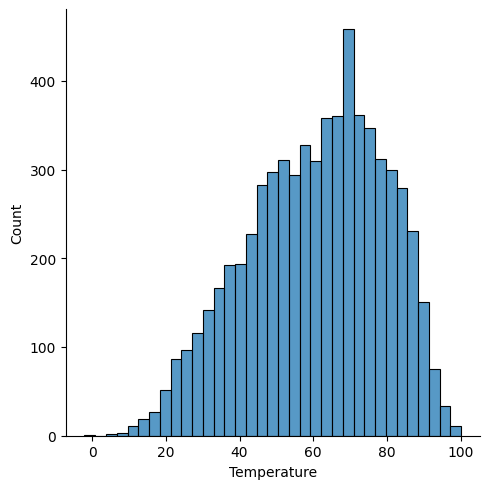

In [87]:
#distribution of the temperature column
sns.displot(data["Temperature"])

In [88]:
test_temp=pd.DataFrame(data.groupby(["year","month"])["Temperature"].mean())

<AxesSubplot:xlabel='month', ylabel='Temperature'>

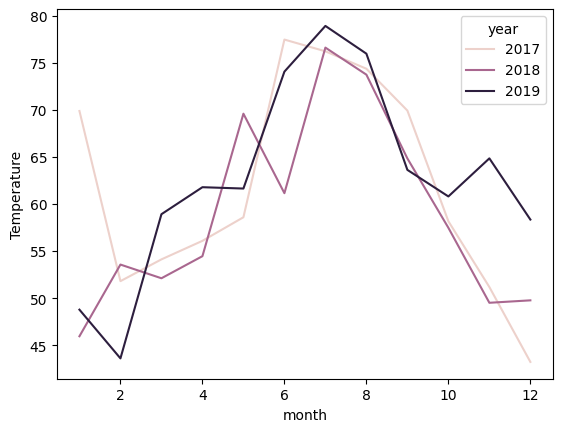

In [89]:
sns.lineplot(data=test_temp,x="month",y="Temperature",hue="year")

In [90]:
test_fuel=pd.DataFrame(data.groupby(["year","month"])["Fuel_Price"].mean())

<AxesSubplot:xlabel='month', ylabel='Fuel_Price'>

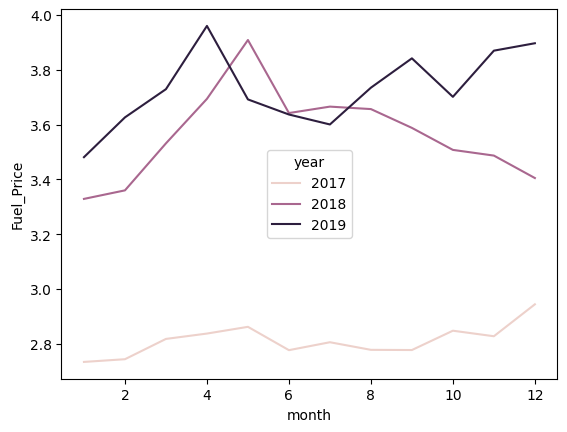

In [91]:
sns.lineplot(data=test_fuel,x="month",y="Fuel_Price",hue="year")

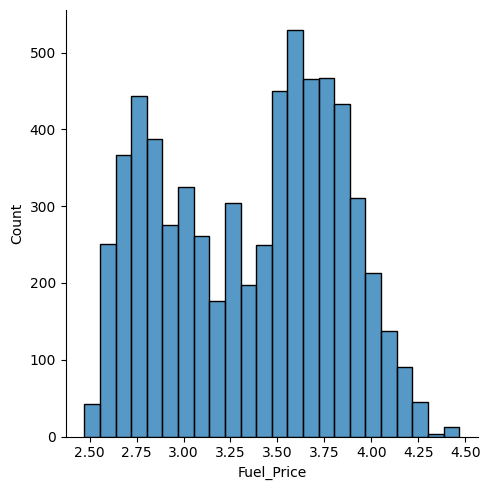

In [92]:
sns.displot(data["Fuel_Price"])

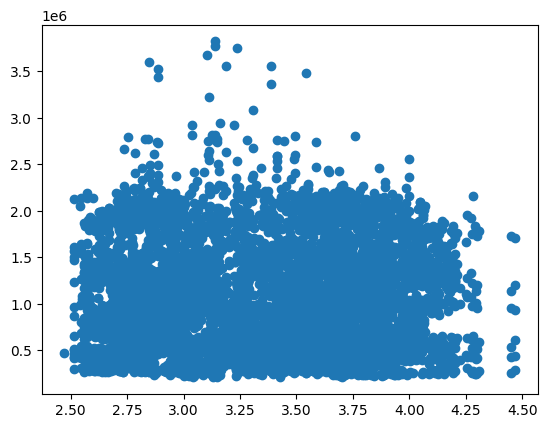

In [93]:
plt.scatter(data["Fuel_Price"],data["Total_Sales"])

In [94]:
test_cpi=pd.DataFrame(data.groupby(["year","month"])["CPI"].mean())

<AxesSubplot:xlabel='month', ylabel='CPI'>

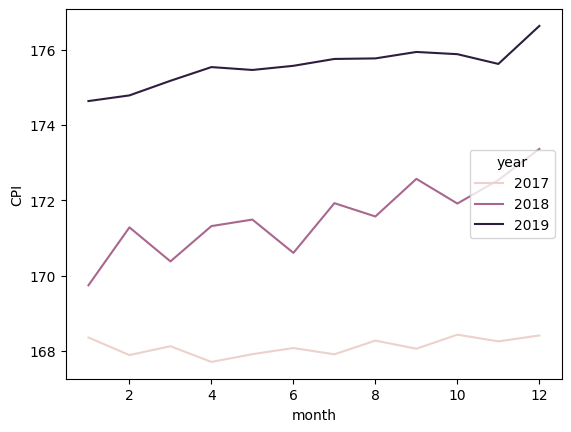

In [95]:
sns.lineplot(data=test_cpi,x="month",y="CPI",hue="year")

In [96]:
test_un=pd.DataFrame(data.groupby(["year","month"])["Unemployment_Rate"].mean())

<AxesSubplot:xlabel='month', ylabel='Unemployment_Rate'>

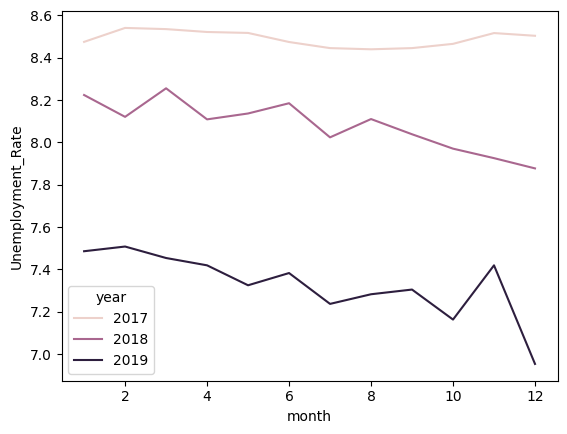

In [97]:
sns.lineplot(data=test_un,x="month",y="Unemployment_Rate",hue="year")

In [88]:
data["Holiday"]=data["Holiday"].map({True:1,False:0})

In [89]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,year,month,day
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,2017,4,30
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1641957.44,2017,11,30
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1611968.17,2017,2,17
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,2017,2,24
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,2017,5,1


In [90]:
final_data=data.merge(store_df,on="Store",how="left")

In [91]:
final_data.shape

(6435, 21)

In [92]:
def marker(x):
    if x==True:
        return 1
    return 0

In [93]:
final_data["Holiday"]=final_data["Holiday"].apply(marker)

In [94]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Holiday,Total_Sales,year,month,day,Type,Address,Area_Code,Location,Size
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,1643690.90,2017,4,30,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,1,1641957.44,2017,11,30,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,0,1611968.17,2017,2,17,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,0,1409727.59,2017,2,24,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,0,1554806.68,2017,5,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315


In [95]:
final_data=final_data.drop(["Address","Area_Code","Location","year","month","day"],axis=1)

In [96]:
final_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate',
       'Holiday', 'Total_Sales', 'Type', 'Size'],
      dtype='object')

In [97]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,E-Commerce Fulfillment,151315
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1641957.44,E-Commerce Fulfillment,151315
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1611968.17,E-Commerce Fulfillment,151315
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,E-Commerce Fulfillment,151315
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,E-Commerce Fulfillment,151315


In [98]:
# final_data=pd.concat([final_data,pd.get_dummies(final_data["Type_y"],drop_first=True)],axis=1)
# final_data.drop("Type_y",axis=1,inplace=True)

In [99]:
numeric_processor=Pipeline(
    steps=[("imputation_constant",SimpleImputer(missing_values=np.nan,fill_value=0)),
          ("scaler",StandardScaler())]

)

In [100]:
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[("onehot",OneHotEncoder(drop="first"))]

)

In [101]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
0,1,2017-04-30,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,E-Commerce Fulfillment,151315
1,1,2017-11-30,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1641957.44,E-Commerce Fulfillment,151315
2,1,2017-02-17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1611968.17,E-Commerce Fulfillment,151315
3,1,2017-02-24,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,E-Commerce Fulfillment,151315
4,1,2017-05-01,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,E-Commerce Fulfillment,151315


In [102]:
final_data=final_data.drop(["Store","Date"],axis=1)

In [103]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,["Type"]),
    ("numerical",numeric_processor,["Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment_Rate","Holiday","Size"])]
)

In [104]:
test_data.shape

(1170, 15)

In [105]:
test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
0,1,2019-02-09,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,NaN,E-Commerce Fulfillment,151315
1,1,2019-09-10,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,NaN,E-Commerce Fulfillment,151315
2,1,2019-11-15,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,NaN,E-Commerce Fulfillment,151315
3,1,2019-11-22,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,NaN,E-Commerce Fulfillment,151315
4,1,2019-11-29,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,NaN,E-Commerce Fulfillment,151315


In [106]:
# X=final_data.drop("Total_Sales",axis=1)
# y=final_data["Total_Sales"]

In [107]:
df_train,df_valid=train_test_split(final_data,test_size=0.2,random_state=0)

In [108]:
df_train

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
4766,34.11,2.955,0.0,0.0,0.00,0.00,0.00,127.087677,10.210,1,902109.69,E-Commerce Fulfillment,158114
5764,33.90,2.728,0.0,0.0,0.00,0.00,0.00,190.974107,7.508,0,1434908.13,E-Commerce Fulfillment,196321
3151,36.07,2.805,0.0,0.0,0.00,0.00,0.00,131.784000,5.892,0,1408082.96,Food,114533
4880,68.90,2.809,0.0,0.0,0.00,0.00,0.00,136.287426,9.051,0,1160412.71,Food,103681
2740,75.14,2.783,0.0,0.0,0.00,0.00,0.00,204.357166,7.527,0,2031852.16,E-Commerce Fulfillment,203742
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,74.17,3.922,0.0,0.0,0.00,0.00,0.00,138.769461,8.512,0,955466.84,Food,103681
3264,52.90,3.947,8839.9,0.0,58.82,1419.42,2237.57,138.088267,4.125,0,1313015.62,Food,114533
1653,91.74,3.743,0.0,0.0,0.00,0.00,0.00,129.240581,13.503,0,966817.24,Food,112238
2607,63.43,2.837,0.0,0.0,0.00,0.00,0.00,132.761933,8.099,0,1318343.58,E-Commerce Fulfillment,203819


In [109]:
# x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [110]:
# x_train

In [111]:
X=df_train.drop("Total_Sales",axis=1)
y=df_train["Total_Sales"]

In [112]:
y

4766     902109.69
5764    1434908.13
3151    1408082.96
4880    1160412.71
2740    2031852.16
           ...    
4931     955466.84
3264    1313015.62
1653     966817.24
2607    1318343.58
2732    1893736.90
Name: Total_Sales, Length: 5148, dtype: float64

In [113]:
y.to_numpy()

array([ 902109.69, 1434908.13, 1408082.96, ...,  966817.24, 1318343.58,
       1893736.9 ])

In [114]:
X.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Type,Size
4766,34.11,2.955,0.0,0.0,0.0,0.0,0.0,127.087677,10.210,1,E-Commerce Fulfillment,158114
5764,33.90,2.728,0.0,0.0,0.0,0.0,0.0,190.974107,7.508,0,E-Commerce Fulfillment,196321
3151,36.07,2.805,0.0,0.0,0.0,0.0,0.0,131.784000,5.892,0,Food,114533
4880,68.90,2.809,0.0,0.0,0.0,0.0,0.0,136.287426,9.051,0,Food,103681
2740,75.14,2.783,0.0,0.0,0.0,0.0,0.0,204.357166,7.527,0,E-Commerce Fulfillment,203742


In [115]:
pd.DataFrame(preprocessor.fit_transform(X),columns=["Food","Religion","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment_Rate","Holiday","Size"])

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size
0,0.0,0.0,-1.437080,-0.877511,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.142078,1.178756,3.625308,0.443914
1,0.0,0.0,-1.448442,-1.373423,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.478730,-0.262822,-0.275839,1.048281
2,1.0,0.0,-1.331042,-1.205206,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.022932,-1.124994,-0.275839,-0.245459
3,1.0,0.0,0.445110,-1.196468,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.908679,0.560403,-0.275839,-0.417118
4,0.0,0.0,0.782703,-1.253268,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.818260,-0.252685,-0.275839,1.165667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,1.0,0.0,0.730225,1.235034,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.845710,0.272835,-0.275839,-0.417118
5144,1.0,0.0,-0.420514,1.289650,1.116220,-0.171539,-0.064493,0.116309,0.155243,-0.862992,-2.067727,-0.275839,-0.245459
5145,1.0,0.0,1.680787,0.843984,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.087459,2.935644,-0.275839,-0.281762
5146,0.0,0.0,0.149175,-1.135298,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.998122,0.052490,-0.275839,1.166885


In [116]:
preprocessor.transform(test_data)

array([[ 0.        ,  0.        , -0.28958821, ..., -0.76166488,
        -0.27583864,  0.33636614],
       [ 0.        ,  0.        ,  0.0306925 , ..., -0.76166488,
        -0.27583864,  0.33636614],
       [ 0.        ,  0.        , -0.41943174, ..., -0.76166488,
        -0.27583864,  0.33636614],
       ...,
       [ 1.        ,  0.        , -0.17759817, ...,  0.17840132,
        -0.27583864, -0.18712171],
       [ 1.        ,  0.        , -0.23819181, ...,  0.17840132,
        -0.27583864, -0.18712171],
       [ 1.        ,  0.        , -0.5427831 , ...,  0.17840132,
        -0.27583864, -0.18712171]])

In [117]:
import pandas as pd

In [118]:
df=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/data_for_target_Sales/main/Store_Details.csv",encoding="latin")
df.head()

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size
0,0.0,0.0,-0.995136,-1.713800,-0.41373,-0.16784,-0.081391,-0.26877,-0.386006,1.004175,0.056964,-0.274204,0.333175
1,0.0,0.0,-1.201170,-1.766089,-0.41373,-0.16784,-0.081391,-0.26877,-0.386006,1.007880,0.056964,3.646917,0.333175
2,0.0,0.0,-1.124178,-1.840166,-0.41373,-0.16784,-0.081391,-0.26877,-0.386006,1.009074,0.056964,-0.274204,0.333175
3,0.0,0.0,-0.760907,-1.737766,-0.41373,-0.16784,-0.081391,-0.26877,-0.386006,1.009849,0.056964,-0.274204,0.333175
4,0.0,0.0,-0.767955,-1.598328,-0.41373,-0.16784,-0.081391,-0.26877,-0.386006,1.010624,0.056964,-0.274204,0.333175


In [119]:
o=OneHotEncoder(drop="first")

In [120]:
o.fit_transform(df[["Type"]]).toarray()

array([[0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## MODEL BUILDING

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/10tanmay100/Target_Sales_Prediction/main/sales_prediction/artifact/data_transformation/2022-09-08-09-06-14/transformed_data/train/train.csv")

In [3]:
df

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size,Total_Sales
0,0.0,0.0,-1.437080,-0.877511,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.142078,1.178756,3.625308,0.443914,1643690.90
1,0.0,0.0,-1.448442,-1.373423,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.478730,-0.262822,-0.275839,1.048281,NaN
2,1.0,0.0,-1.331042,-1.205206,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.022932,-1.124994,-0.275839,-0.245459,1611968.17
3,1.0,0.0,0.445110,-1.196468,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.908679,0.560403,-0.275839,-0.417118,1409727.59
4,0.0,0.0,0.782703,-1.253268,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.818260,-0.252685,-0.275839,1.165667,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689326.91
6173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303559.23
6174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620087.35
6175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492364.77


In [4]:
df=pd.read_csv("train.csv")

In [5]:
df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Type,Size
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1643690.90,E-Commerce Fulfillment,151315
1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,1641957.44,E-Commerce Fulfillment,151315
2,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,1611968.17,E-Commerce Fulfillment,151315
3,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,1409727.59,E-Commerce Fulfillment,151315
4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,1554806.68,E-Commerce Fulfillment,151315


In [6]:
import pickle
file = open("preprocessed.pkl",'rb')
object_file = pickle.load(file)

In [7]:
X=df.drop("Total_Sales",axis=1)
y=df["Total_Sales"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
file=pd.DataFrame(object_file.transform(x_train),columns=["Food","Religion","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment_Rate","Holiday","Size"])

In [19]:
file=file.reset_index(drop=True)

In [20]:
y_train=y_train.reset_index(drop=True)

In [22]:
pd.concat([file,y_train],axis=1)

,Food,Religion,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Size,Total_Sales
0,0.0,0.0,-1.437080,-0.877511,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.142078,1.178756,3.625308,0.443914,902109.69
1,0.0,0.0,-1.448442,-1.373423,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.478730,-0.262822,-0.275839,1.048281,1434908.13
2,1.0,0.0,-1.331042,-1.205206,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.022932,-1.124994,-0.275839,-0.245459,1408082.96
3,1.0,0.0,0.445110,-1.196468,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.908679,0.560403,-0.275839,-0.417118,1160412.71
4,0.0,0.0,0.782703,-1.253268,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,0.818260,-0.252685,-0.275839,1.165667,2031852.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,1.0,0.0,0.730225,1.235034,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.845710,0.272835,-0.275839,-0.417118,955466.84
5144,1.0,0.0,-0.420514,1.289650,1.116220,-0.171539,-0.064493,0.116309,0.155243,-0.862992,-2.067727,-0.275839,-0.245459,1313015.62
5145,1.0,0.0,1.680787,0.843984,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-1.087459,2.935644,-0.275839,-0.281762,966817.24
5146,0.0,0.0,0.149175,-1.135298,-0.416868,-0.171539,-0.076158,-0.271466,-0.374964,-0.998122,0.052490,-0.275839,1.166885,1318343.58
